T = 20.524184785591203


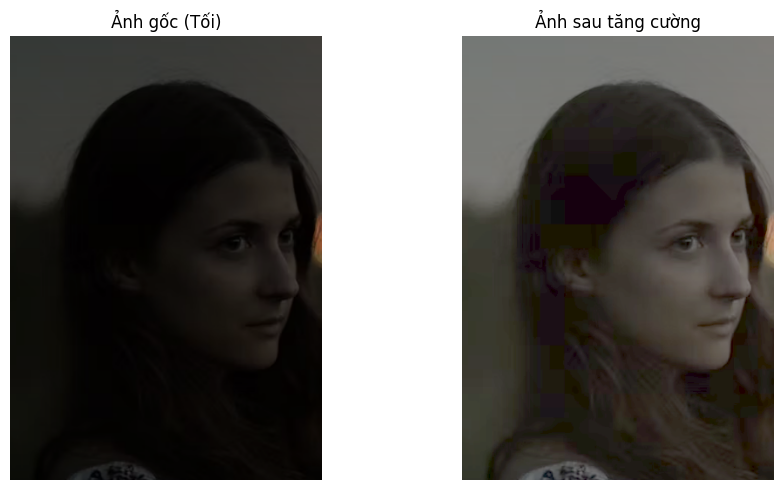

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_augmentation(image, T1=50, T2=100, gamma_low=0.5, gamma_mid=0.8):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    mean_intensity = np.mean(gray)
    print("T =", mean_intensity)

    if mean_intensity < T1:
        gamma = gamma_low
        image = gamma_correction(image, gamma)
    elif T1 <= mean_intensity < T2:
        gamma = gamma_mid
        image = gamma_correction(image, gamma)
    else:
        image = contrast_stretching(image)
    
    return image

def gamma_correction(image, gamma):
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

def histogram_equalization(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * 255.0 / (max_val - min_val + 1e-6)
    return stretched.astype(np.uint8)

# --- Ví dụ sử dụng ---
if __name__ == "__main__":
    # Đọc ảnh đầu vào
    img = cv2.imread("dark_image.png")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Áp dụng tăng cường
    enhanced_img = adaptive_augmentation(img_rgb)

    # Hiển thị ảnh gốc và ảnh tăng cường nằm ngang
    plt.figure(figsize=(10, 5))

    # Ảnh gốc
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Ảnh gốc (Tối)")
    plt.axis('off')

    # Ảnh sau tăng cường
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_img)
    plt.title("Ảnh sau tăng cường")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Lưu kết quả nếu cần
    cv2.imwrite("enhanced_image.jpg", cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR))